In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

import seaborn as sns

#Loading the dataset
carseats_df = pd.read_csv('/Users/nicolaswilliams/Desktop/MSCA 681/Datasets-20251004/Carseats.csv')

print(carseats_df.head())



   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  \
0           1   9.50        138      73           11         276    120   
1           2  11.22        111      48           16         260     83   
2           3  10.06        113      35           10         269     80   
3           4   7.40        117     100            4         466     97   
4           5   4.15        141      64            3         340    128   

  ShelveLoc  Age  Education Urban   US  
0       Bad   42         17   Yes  Yes  
1      Good   65         10   Yes  Yes  
2    Medium   59         12   Yes  Yes  
3    Medium   55         14   Yes  Yes  
4       Bad   38         13   Yes   No  


# A. Data Exploration and Exploration

## 1.1 Explore and visualize the dataset. Look into dataset structure, missing values, summary statistics.

In [45]:
carseats_df = pd.read_csv('/Users/nicolaswilliams/Desktop/MSCA 681/Datasets-20251004/Carseats.csv')
# Data Structure 
print('\n1. BASIC DATASET INFO:')
print(f'Dataset shape: {carseats_df.shape}')
print(f'Dataset rows: {carseats_df.shape[0]}')
print(f'Dataset columns: {carseats_df.shape[1]}')

print('\n2. COLUMN INFORMATION:')
print(carseats_df.info())
numeric_variables = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
categorical_variables = ['ShelveLoc', 'Urban', 'US']
print("Numerical Variables Columns:", numeric_variables)
print("Categorical Variables Columns:", categorical_variables)

print('\n3. DATA TYPES:')
print(carseats_df.dtypes)

# Missing Value 
print('\n4. MISSING VALUES COUNT:')
missing_values = carseats_df.isnull().sum() 
print(missing_values)

# Looking into the categorical values
print('\n5. CATEGORICAL VALUES:')
for col in categorical_variables:
  print(f"\nValue counts for {col}:")
  print(carseats_df[col].value_counts())  

# Summary statistics 
print('\n6. SUMMARY STATISTICS:')
carseats_df.describe()




1. BASIC DATASET INFO:
Dataset shape: (400, 12)
Dataset rows: 400
Dataset columns: 12

2. COLUMN INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB
None
Numerical Variables Columns: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
Categori

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## 1.2 Create at least 5 histograms, 5 box plots, 5 bar charts, 5 scatterplots using the numerical and categorical input variables and the output variable in your dataset.

### Histogram

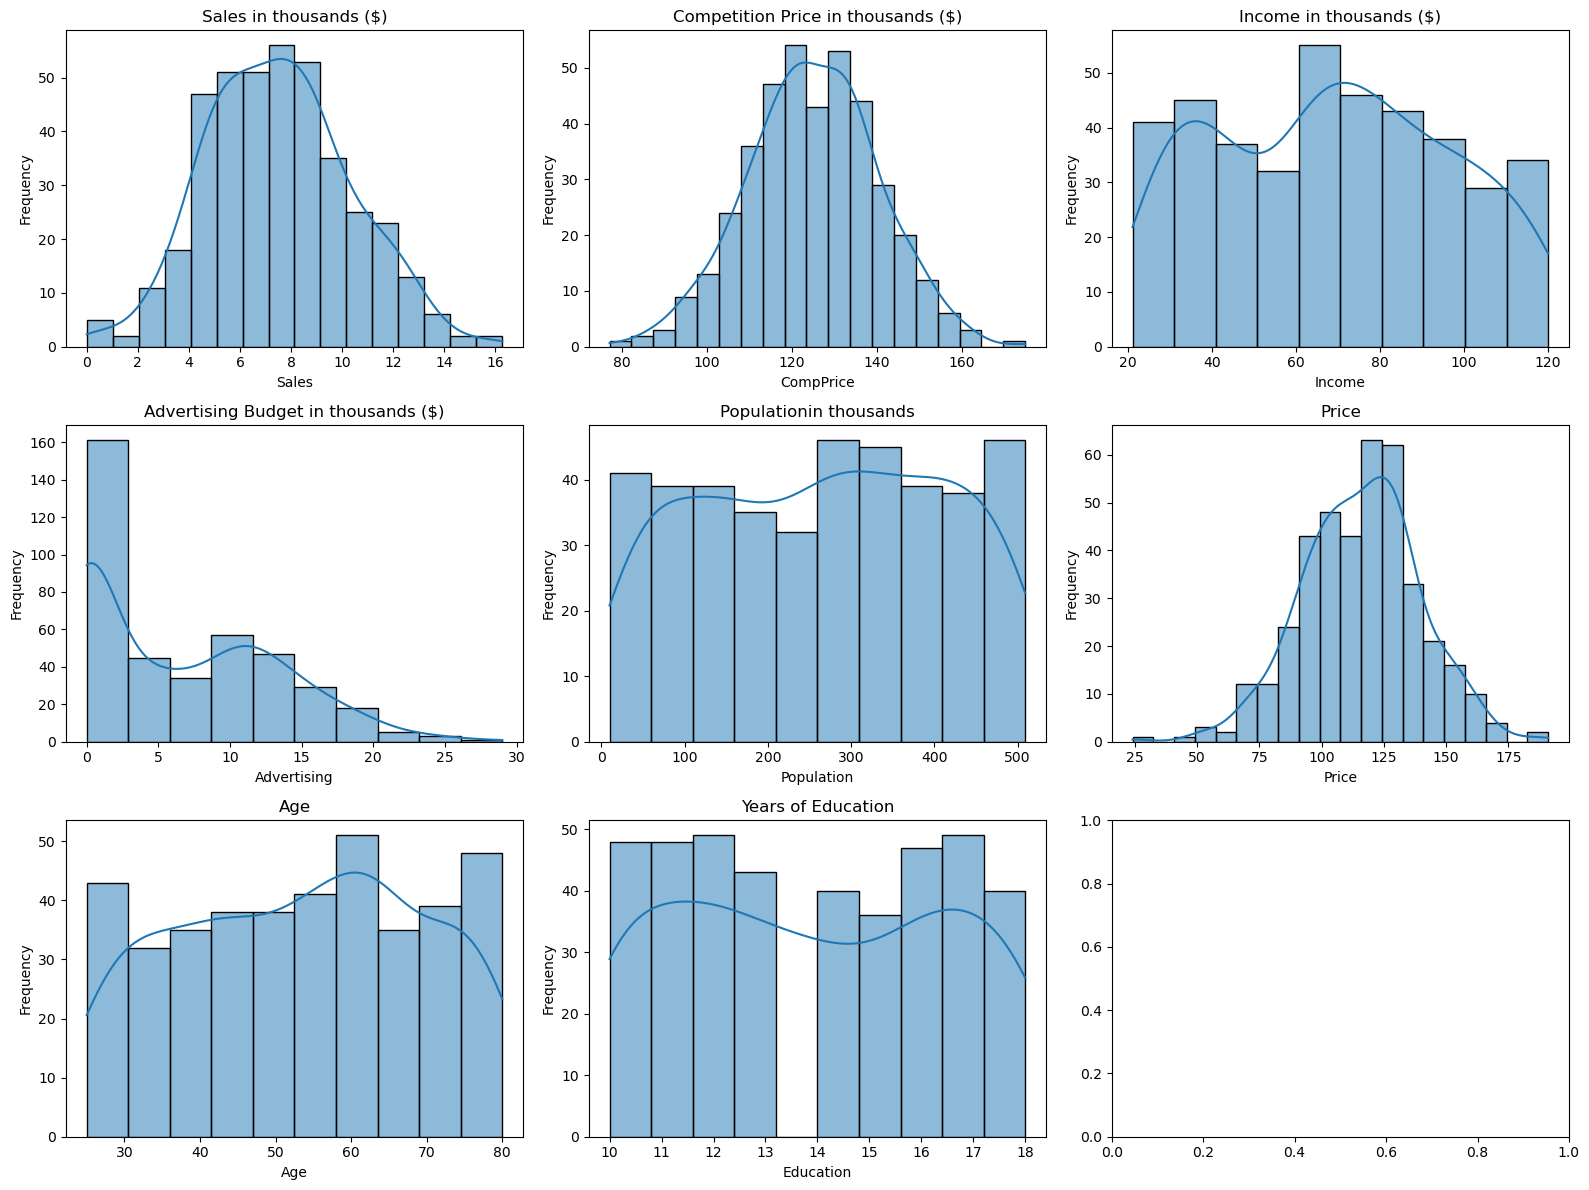

In [106]:
# Create a list of titles 
titles = [
    "Sales in thousands ($)", "Competition Price in thousands ($)", "Income in thousands ($)",
    "Advertising Budget in thousands ($)", "Populationin thousands", 
    "Price", "Age", "Years of Education"]

# Prepare the variables
histo_vars = numeric_variables

# Create a figure and axes for subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easier indexing

for i, col in enumerate(histo_vars):
    sns.histplot(data=carseats_df, x=col, kde=True, ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Box Plots

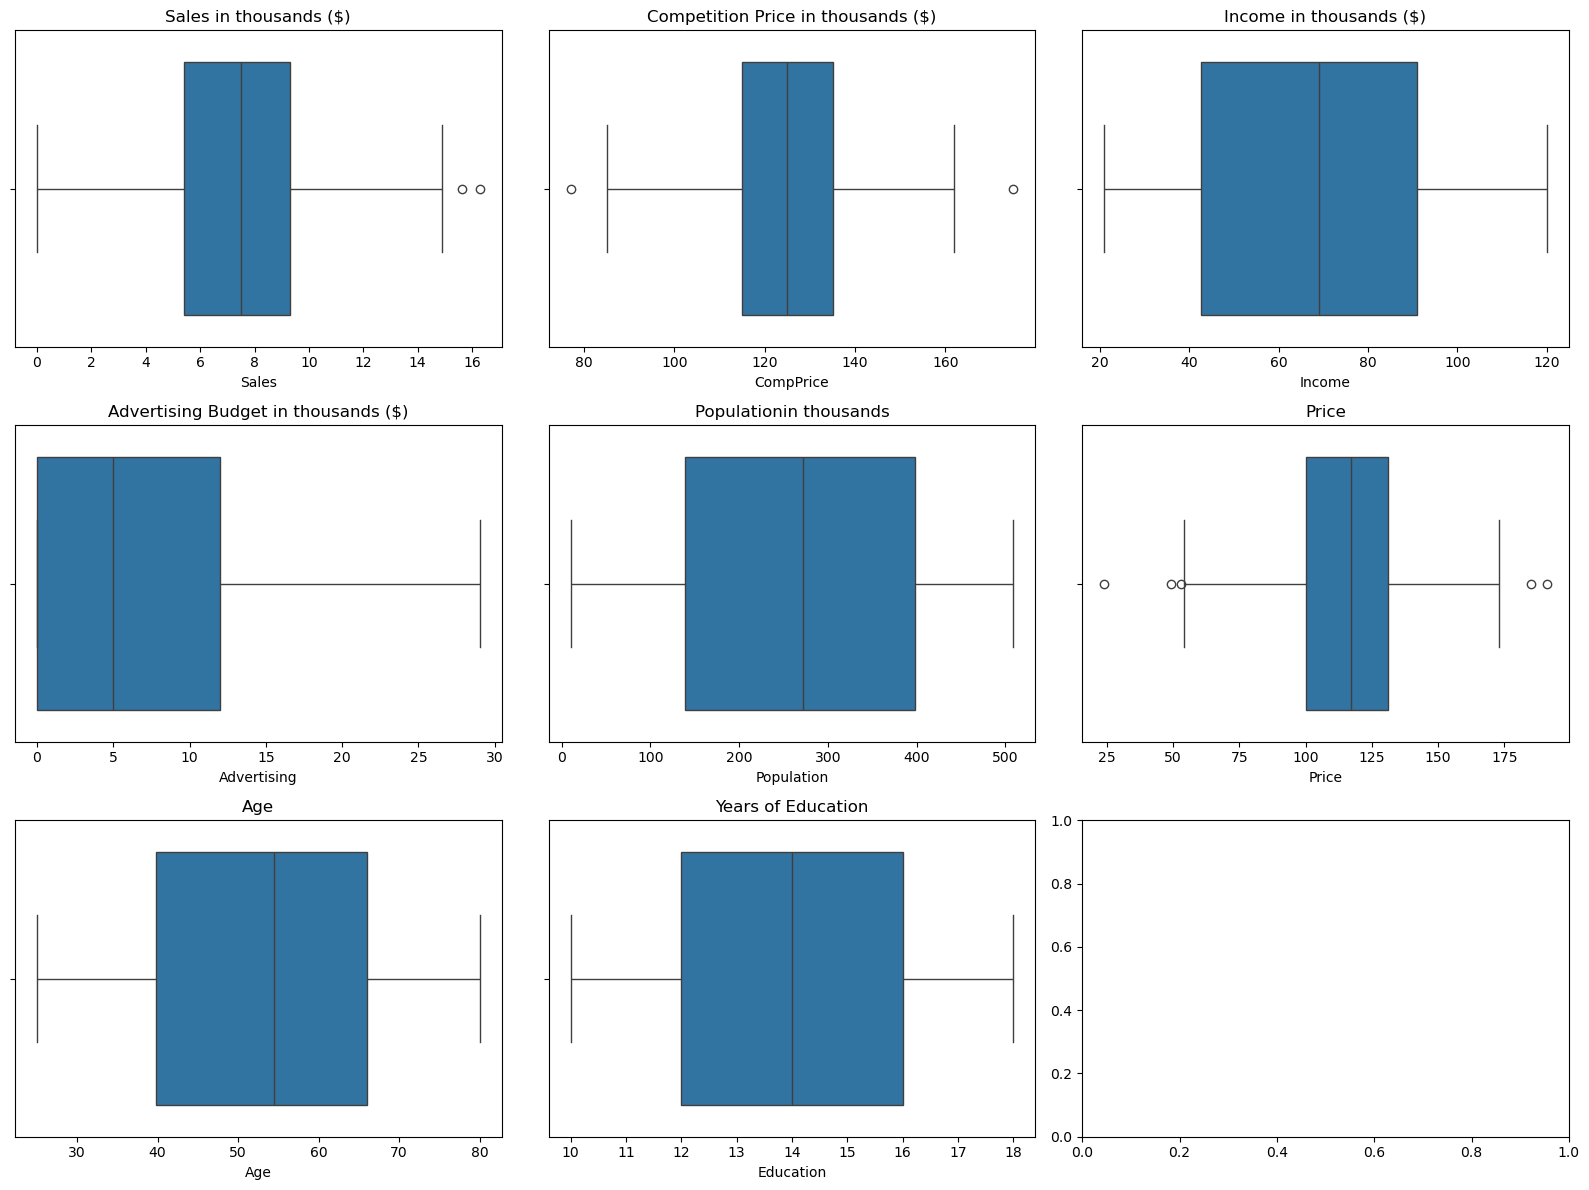

In [107]:
# Create a list of titles 
titles = [
    "Sales in thousands ($)", "Competition Price in thousands ($)", "Income in thousands ($)",
    "Advertising Budget in thousands ($)", "Populationin thousands", 
    "Price", "Age", "Years of Education"]
# Prepare the variables
box_vars = numeric_variables

# Create a figure and axes for subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easier indexing

for i, col in enumerate(box_vars):
    sns.boxplot(data=carseats_df, x=col, ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
 

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Bar Charts

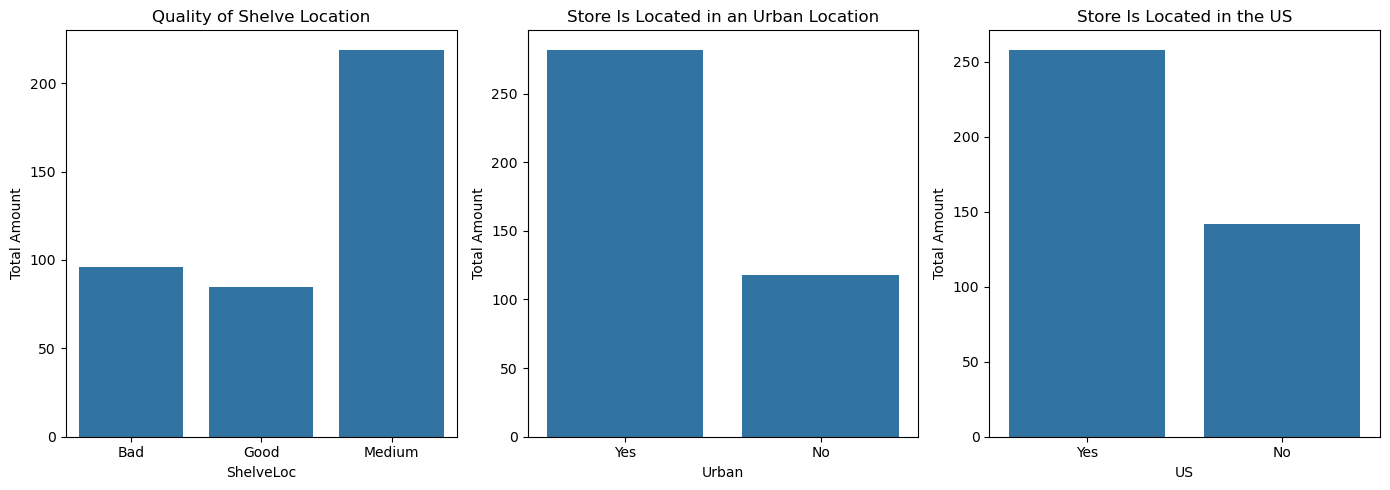

In [99]:
carseats_df = pd.read_csv('/Users/nicolaswilliams/Desktop/MSCA 681/Datasets-20251004/Carseats.csv')

categorical_variables = ['ShelveLoc', 'Urban', 'US']

# Create a list of titles 
titles = ['Quality of Shelve Location', 'Store Is Located in an Urban Location', 'Store Is Located in the US']

# Bar charts for categorical counts
bar_vars = categorical_variables
fig, axes = plt.subplots(1, 3, figsize=(14, 5))  # Changed to 1 row, 3 columns
axes = axes.ravel()  # Flattens axes into a 1D array

for i, col in enumerate(bar_vars):
    sns.countplot(data=carseats_df, x=col, ax=axes[i])
    # Added colour and smoothened edges
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Total Amount")

plt.tight_layout()
plt.show()

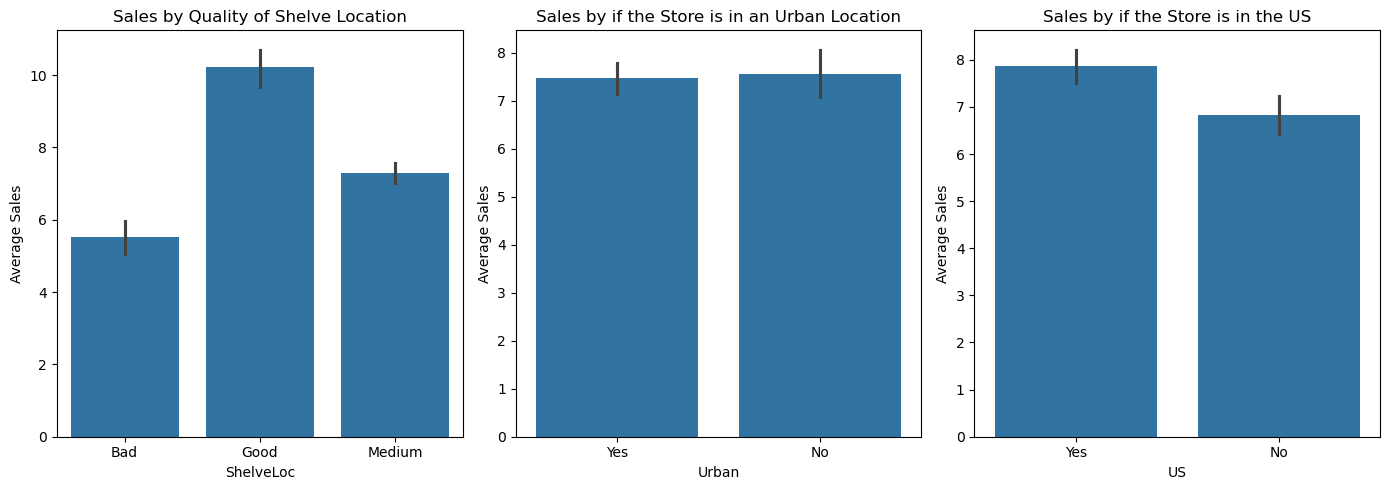

In [103]:
carseats_df = pd.read_csv('/Users/nicolaswilliams/Desktop/MSCA 681/Datasets-20251004/Carseats.csv')
group_vars = [('ShelveLoc', 'Sales'), ('Urban', 'Sales'), ('US', 'Sales')]

# Create a list of titles 
titles = ["Sales by Quality of Shelve Location", "Sales by if the Store is in an Urban Location", "Sales by if the Store is in the US"]

# Bar charts for categorical counts
fig, axes = plt.subplots(1, 3, figsize=(14, 5)) 
axes = axes.ravel()  # Flattens axes into a 1D array

for i, (cat_col, num_col) in enumerate(group_vars):
    sns.barplot(data=carseats_df, x=cat_col, y=num_col, ax=axes[i])
    # Added colour and smoothened edges
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel("Average Sales")

plt.tight_layout()
plt.show()

### Scatterplots

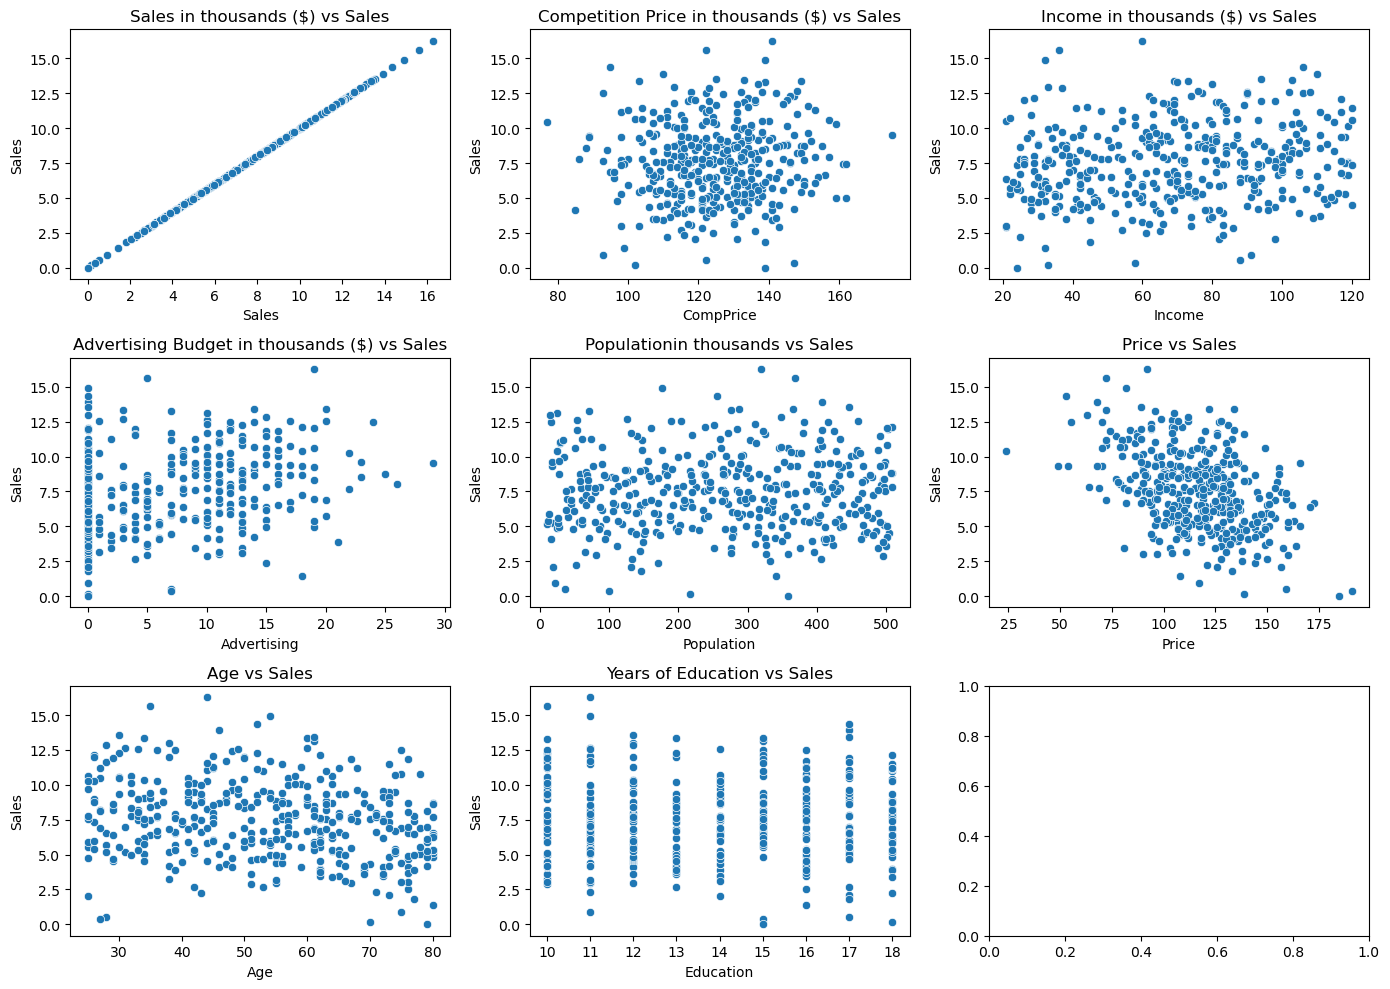

In [110]:
#Scatter charts (numerical vs sales)
#income #population #advertising #age #price
scatter_vars = numeric_variables
titles= [
    "Sales in thousands ($)", "Competition Price in thousands ($)", "Income in thousands ($)",
    "Advertising Budget in thousands ($)", "Populationin thousands", 
    "Price", "Age", "Years of Education"]

fig, axes = plt.subplots(3,3, figsize=(14,10))
axes = axes.ravel()

for i, col in enumerate(scatter_vars):
    sns.scatterplot(data=carseats_df, x=col, y='Sales', ax=axes[i])
    axes[i].set_title(f"{(titles[i])} vs Sales")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Sales")

plt.tight_layout()
plt.show()

## 2. Examine relationships between numerical variables. Identify highly correlated variables with each other and with the target. Discuss whether these variables should be dropped or not, considering the type of models you will use later.

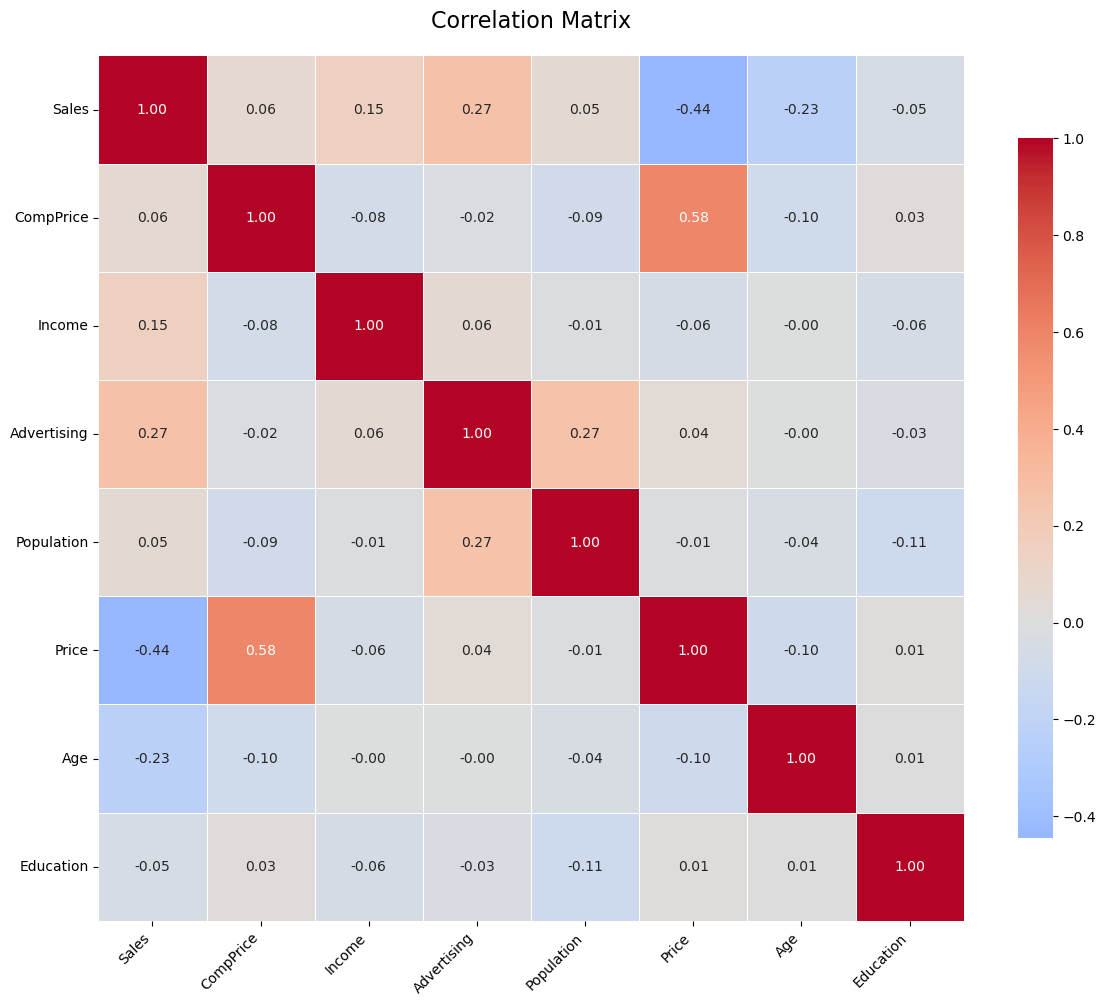

In [16]:
# Remove the unnamed variable
carseats_df = carseats_df.drop('Unnamed: 0', axis=1)

# Calculate the numerical variable correlation matrix for numeric columns only
corr_train = carseats_df.corr(numeric_only=True)

# Plot the correlation matrix with heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(corr_train,  
            annot=True,              
            cmap='coolwarm',         
            fmt='.2f',               
            square=True,             
            cbar_kws={"shrink": .8}, 
            linewidths=0.5,          
            center=0)                
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.tight_layout()                   
plt.show()

## 3. Convert categorical variables into numeric form using dummy variables.

In [46]:
carseats_df = pd.read_csv('/Users/nicolaswilliams/Desktop/MSCA 681/Datasets-20251004/Carseats.csv')

# Let's one-hot encode our categorical variables
carseats_df = pd.get_dummies(carseats_df, columns=["ShelveLoc", "Urban", "US"], drop_first = True, dtype = 'int')

# With the new dummy variables
print(carseats_df.head(10))

# Looking into the categorical values
categorical_variables = ['ShelveLoc_Good','ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']
for col in categorical_variables:
  print(f"\nValue counts for {col}:")
  print(carseats_df[col].value_counts()) 

   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  Age  \
0           1   9.50        138      73           11         276    120   42   
1           2  11.22        111      48           16         260     83   65   
2           3  10.06        113      35           10         269     80   59   
3           4   7.40        117     100            4         466     97   55   
4           5   4.15        141      64            3         340    128   38   
5           6  10.81        124     113           13         501     72   78   
6           7   6.63        115     105            0          45    108   71   
7           8  11.85        136      81           15         425    120   67   
8           9   6.54        132     110            0         108    124   76   
9          10   4.69        132     113            0         131    124   76   

   Education  ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0         17               0                 0     

## 4. Partition the data into a training set (60%), validation set (20%), and test set (20%) (set random_state=42).

In [21]:
from sklearn.model_selection import train_test_split

#Split the data into temp and test sets
temp_df, train_df = train_test_split(carseats_df, test_size=0.6, random_state=42)

#Split the data into train and validation sets
test_df, validation_df = train_test_split(temp_df, test_size=0.5, random_state=42)

#Print the shapes
print(f"Train set: {train_df.shape[0]}")
print(f"Validation shape: {validation_df.shape[0]}")
print(f"Test shape: {test_df.shape[0]}")

Train set: 240
Validation shape: 80
Test shape: 80


In [ ]:
#test drive important

#just to confirm that it says the same thing please work

In [ ]:
#just to confirm that it saves correctly --- IGNORE ---

#test je veux just m'assurer que il faut juste save 1.1

# Save the datasets to CSV files example